In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
import pandas as pd

# vip_df.csv와 combined_201812.csv 파일 불러오기
vip_df = pd.read_csv("vip_df.csv")
combined_df = pd.read_csv("../data/combined_ab.csv")

# vip_df에서 'Segment' 컬럼 포함하여 병합
vip_ab = pd.merge(vip_df[['ID', 'Segment']], combined_df, on='ID', how='inner')  # ID를 기준으로 병합

# 병합된 데이터프레임 확인
vip_ab.head()  # 상위 5개 행을 확인

,ID,Segment,_1순위카드이용금액,할부금액_3M_R12M,이용금액_할부_무이자_R12M,이용건수_할부_무이자_R12M,정상입금원금_B0M,이용금액_오프라인_R6M,정상청구원금_B0M,이용금액_오프라인_R3M,...,_1순위업종_이용금액,할부금액_무이자_3M_R12M,청구금액_R3M,마일_적립포인트_R3M,포인트_마일리지_환산_B0M,청구금액_B0,청구금액_R6M,평잔_일시불_해외_6M,잔액_할부_B0M,잔액_할부_무이자_B0M
0,TRAIN_000000,D,3027,3357,5490,3,7200,23609,15067,11756,...,2015,1007,42163,0,0,13976,85879,0,866,866
1,TRAIN_000002,C,26968,0,10944,4,18912,43371,26184,24370,...,16480,0,84250,0,0,31404,156628,0,2370,2370
2,TRAIN_000003,D,4807,21311,7340,6,9657,24783,20959,12529,...,1961,7340,72964,0,0,25628,124621,0,2092,0
3,TRAIN_000008,C,59033,9844,1556,0,21371,91896,25321,45741,...,79353,1556,95297,0,0,34291,159044,429,2225,0
4,TRAIN_000012,D,39049,2057,7932,4,14249,74339,14762,36321,...,37875,2057,44807,0,0,16485,91492,0,0,0


In [3]:
vip_ab.isnull().sum()

ID                  0
Segment             0
_1순위카드이용금액          0
할부금액_3M_R12M        0
이용금액_할부_무이자_R12M    0
이용건수_할부_무이자_R12M    0
정상입금원금_B0M          0
이용금액_오프라인_R6M       0
정상청구원금_B0M          0
이용금액_오프라인_R3M       0
승인거절건수_입력오류_B0M     0
이용금액_일시불_R12M       0
이용금액_할부_무이자_R3M     0
이용금액_할부_무이자_R6M     0
정상입금원금_B5M          0
이용금액_할부_R12M        0
정상청구원금_B2M          0
정상입금원금_B2M          0
할부건수_무이자_3M_R12M    0
정상청구원금_B5M          0
여유_숙박이용금액           0
최대이용금액_일시불_R12M     0
_1순위업종_이용금액         0
할부금액_무이자_3M_R12M    0
청구금액_R3M            0
마일_적립포인트_R3M        0
포인트_마일리지_환산_B0M     0
청구금액_B0             0
청구금액_R6M            0
평잔_일시불_해외_6M        0
잔액_할부_B0M           0
잔액_할부_무이자_B0M       0
dtype: int64

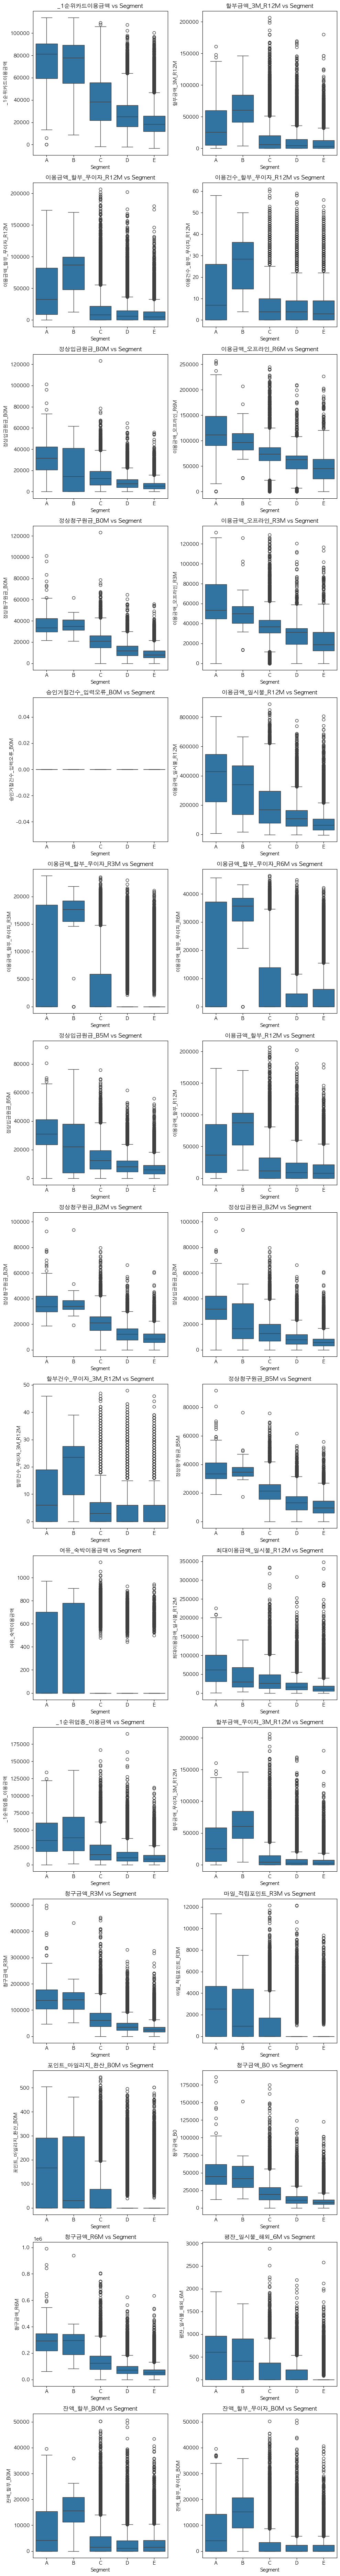

In [10]:
# 1. 'ID'와 'Segment' 컬럼을 제외한 나머지 컬럼만 선택
columns_to_plot = vip_ab.drop(columns=['ID', 'Segment']).columns

# 2. Segment 순서를 A, B, C, D, E로 지정
segment_order = ['A', 'B', 'C', 'D', 'E']

# 3. 그래프 크기 및 서브플롯 설정 (2열로 출력)
num_plots = len(columns_to_plot)
num_rows = (num_plots // 2) + (num_plots % 2)  # 2열로 출력하되, 나머지는 한 줄에 출력

# 4. 서브플롯 생성
plt.figure(figsize=(10, num_rows * 5))

# 각 컬럼에 대해 박스플롯 그리기
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 2, i + 1)  # 2열로 배치
    sns.boxplot(x='Segment', y=column, data=vip_ab, order=segment_order)
    plt.title(f'{column} vs Segment')  # 제목 추가
    plt.tight_layout()

plt.show()